In [51]:
import decimal
from collections.abc import Callable
import matplotlib.pyplot as plt
import math

In [52]:
class RK4Eq:
    def __init__(self, x0: float, y0: float, step: float,
                otrezok: list[float], func: Callable[[float, float], float]):
        self.x0 = x0
        self.y0 = y0
        self.step = step
        self.start_point = otrezok[0]
        self.end_point = otrezok[1]
        self.func = func
        self.x_points = []
        self.y_points = []

    def counting_points(self):
        x, y, i = self.x0, self.y0, self.x0
        if x > self.start_point:
            while i > self.start_point:
                x -= self.step
                k1 = self.step * self.func(x, y)
                k2 = self.step * self.func(x + self.step / 2, y + k1 / 2)
                k3 = self.step * self.func(x + self.step / 2, y + k2 / 2)
                k4 = self.step * self.func(x + self.step, y + k3)
                y -= (k1 + 2 * k2 + 2 * k3 + k4) / 6
                if self.start_point <= x <= self.end_point:
                    self.x_points.append(x)
                    self.y_points.append(y)
                i -= self.step
            self.x_points = self.x_points[::-1]
            self.y_points = self.y_points[::-1]
        if self.start_point <= self.x0 <= self.end_point:
            self.x_points.append(self.x0)
            self.y_points.append(self.y0)
        x, y, i = self.x0, self.y0, self.x0
        while i <= self.end_point:
            x += self.step
            k1 = self.step * self.func(x, y)
            k2 = self.step * self.func(x + self.step / 2, y + k1 / 2)
            k3 = self.step * self.func(x + self.step / 2, y + k2 / 2)
            k4 = self.step * self.func(x + self.step, y + k3)
            y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
            if self.start_point <= x <= self.end_point:
                self.x_points.append(x)
                self.y_points.append(y)
            i += self.step
        return self.x_points, self.y_points

В цепь последовательно включены источник напряжения U = 100sin50t, резистор сопротивлением 2 Ом и катушка с индуктивностью 0,4 Гн.
Найти амплитуду силы тока в цепи при установившемся режиме.

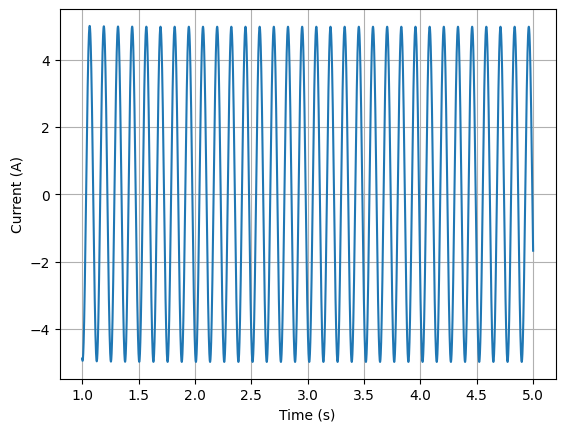

Amplitude of the current: 4.987 A


In [53]:
def func(t, I):
    U = 100 * math.sin(50 * t)
    R = 2
    L = 0.4
    return (U - R * I) / L

# Начальные условия и параметры

x0 = 0
y0 = 0
step = 0.000001
otrezok = [1, 5]

# Создаем экземпляр класса RK4Eq и решаем уравнение

euler_eq = RK4Eq(x0, y0, step, otrezok, func)
x_points, y_points = euler_eq.counting_points()

# Находим амплитуду тока

plt.plot(x_points, y_points)
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

# Определяем амплитуду тока как максимальное значение тока из полученных значений
amplitude_current = (max(y_points) - min(y_points)) / 2
print(f'Amplitude of the current: {amplitude_current:.3f} A')